In [1]:
import pandas as pd

# Loading the data
product_df = pd.read_csv('dataset_dim_products.csv')
customer_df = pd.read_csv('dataset_dim_customers.csv')
order_df = pd.read_csv('dataset_fact_orders.csv')

print("Product data:")
print(product_df.head())

print("\nCustomer data")
print(customer_df.head())

print("\nOrder data")
print(order_df.head())


Product data:
  Product ID Category Sub-category Product Name Brand Name Size  Color  \
0      P0001    Women      Topwear     T-Shirts   Roadster   40  Black   
1      P0002    Women      Topwear     T-Shirts   Roadster   40   Blue   
2      P0003    Women      Topwear     T-Shirts   Roadster   42  White   
3      P0004    Women      Topwear     T-Shirts   Roadster   44  Green   
4      P0005    Women      Topwear     T-Shirts       Puma   38  Olive   

   Ratings  
0      4.0  
1      5.0  
2      3.0  
3      2.0  
4      5.0  

Customer data
  Customer ID  Customer Age    City        State
0        C001            30  Mumbai  Maharashtra
1        C002            35  Mumbai  Maharashtra
2        C003            36  Mumbai  Maharashtra
3        C004            40    Pune  Maharashtra
4        C005            25    Pune  Maharashtra

Order data
  Order ID Customer ID Product ID       Date  Original Price Discount%
0   OD0001        C001      P0001   2/7/2022           349.0    30.00%


In [2]:
# Check for missing values in each DataFrame
print("Missing values in Product DataFrame:")
print(product_df.isnull().sum())

print("\nMissing values in Customer DataFrame:")
print(customer_df.isnull().sum())

print("\nMissing values in Order DataFrame:")
print(order_df.isnull().sum())

# Convert 'Date' column in datetime format
order_df['Date'] = pd.to_datetime(order_df['Date'])

# Check data types of each column
print("\nData types of columns in Product DataFrame:")
print(product_df.dtypes)

print("\nData types of columns in Customer DataFrame:")
print(customer_df.dtypes)

print("\nData types of columns in Order DataFrame:")
print(order_df.dtypes)


Missing values in Product DataFrame:
Product ID      0
Category        0
Sub-category    0
Product Name    0
Brand Name      0
Size            0
Color           0
Ratings         0
dtype: int64

Missing values in Customer DataFrame:
Customer ID     0
Customer Age    0
City            0
State           0
dtype: int64

Missing values in Order DataFrame:
Order ID          0
Customer ID       0
Product ID        0
Date              0
Original Price    0
Discount%         0
dtype: int64

Data types of columns in Product DataFrame:
Product ID       object
Category         object
Sub-category     object
Product Name     object
Brand Name       object
Size             object
Color            object
Ratings         float64
dtype: object

Data types of columns in Customer DataFrame:
Customer ID     object
Customer Age     int64
City            object
State           object
dtype: object

Data types of columns in Order DataFrame:
Order ID                  object
Customer ID               object
P

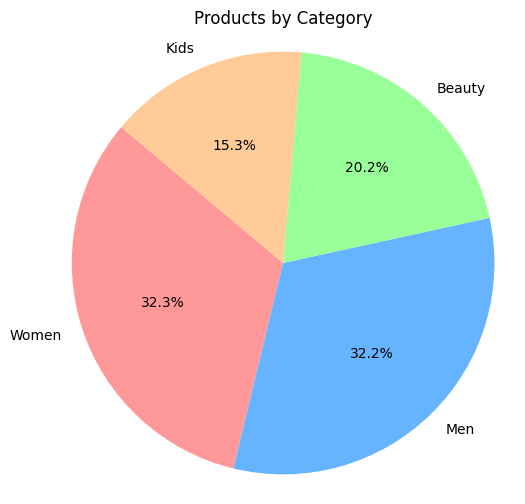

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of products by category
product_count = product_df['Category'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = [0, 1, 0, 0]
# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(product_count, labels=product_count.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Products by Category')
plt.axis('equal') 
plt.show()


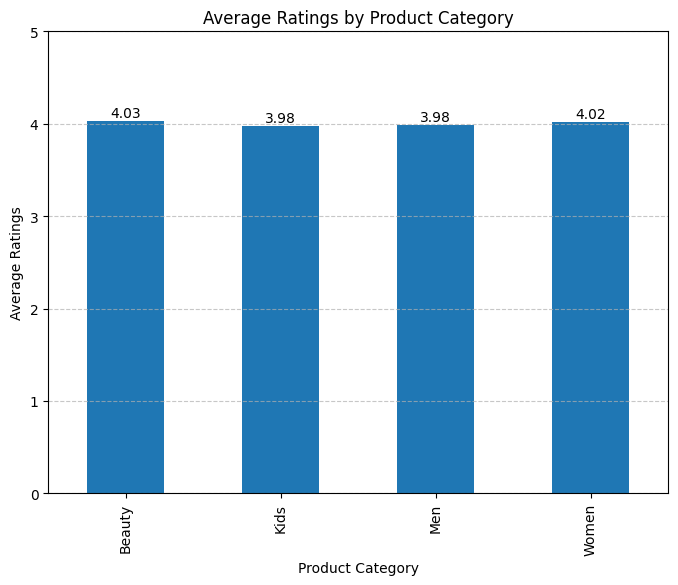

In [4]:

avg_ratings_by_category = product_df.groupby('Category')['Ratings'].mean()

# Bar graph b/w Average rating and product category
plt.figure(figsize=(8, 6))
avg_ratings_by_category.plot(kind='bar', label='Average Ratings')
plt.title('Average Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show ratings on the bars
for i, rating in enumerate(avg_ratings_by_category):
    plt.text(i, rating + 0.01, f'{rating:.2f}', ha='center', va='bottom', color='black')

plt.ylim(0, 5)

plt.show()


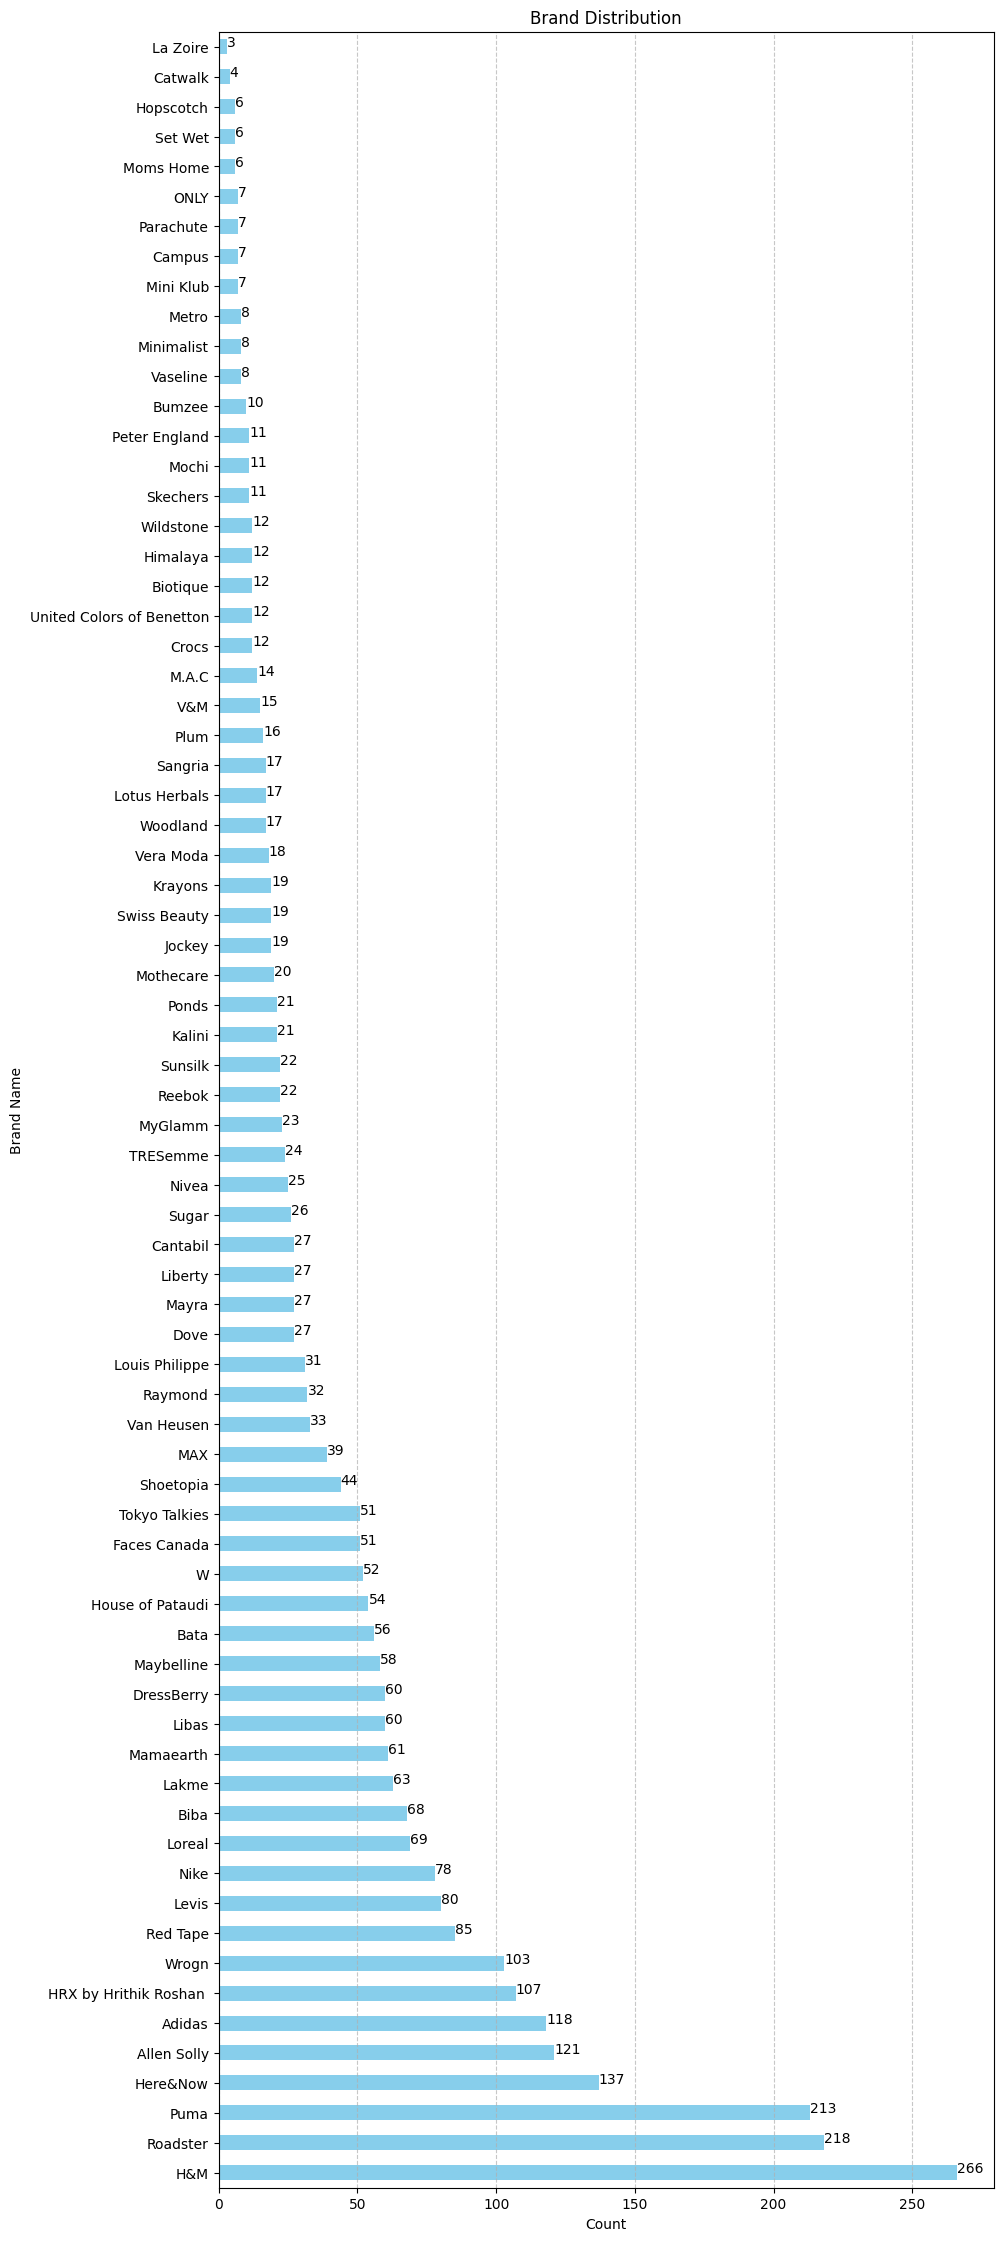

In [5]:

brand_distribution = product_df['Brand Name'].value_counts()

# Plot horizontal bar graph with count numbers on top of bars
plt.figure(figsize=(10, 28))
brand_distribution.plot(kind='barh', color='skyblue')
plt.title('Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add count numbers on top of bars
for index, value in enumerate(brand_distribution):
    plt.text(value, index, str(value))

plt.show()


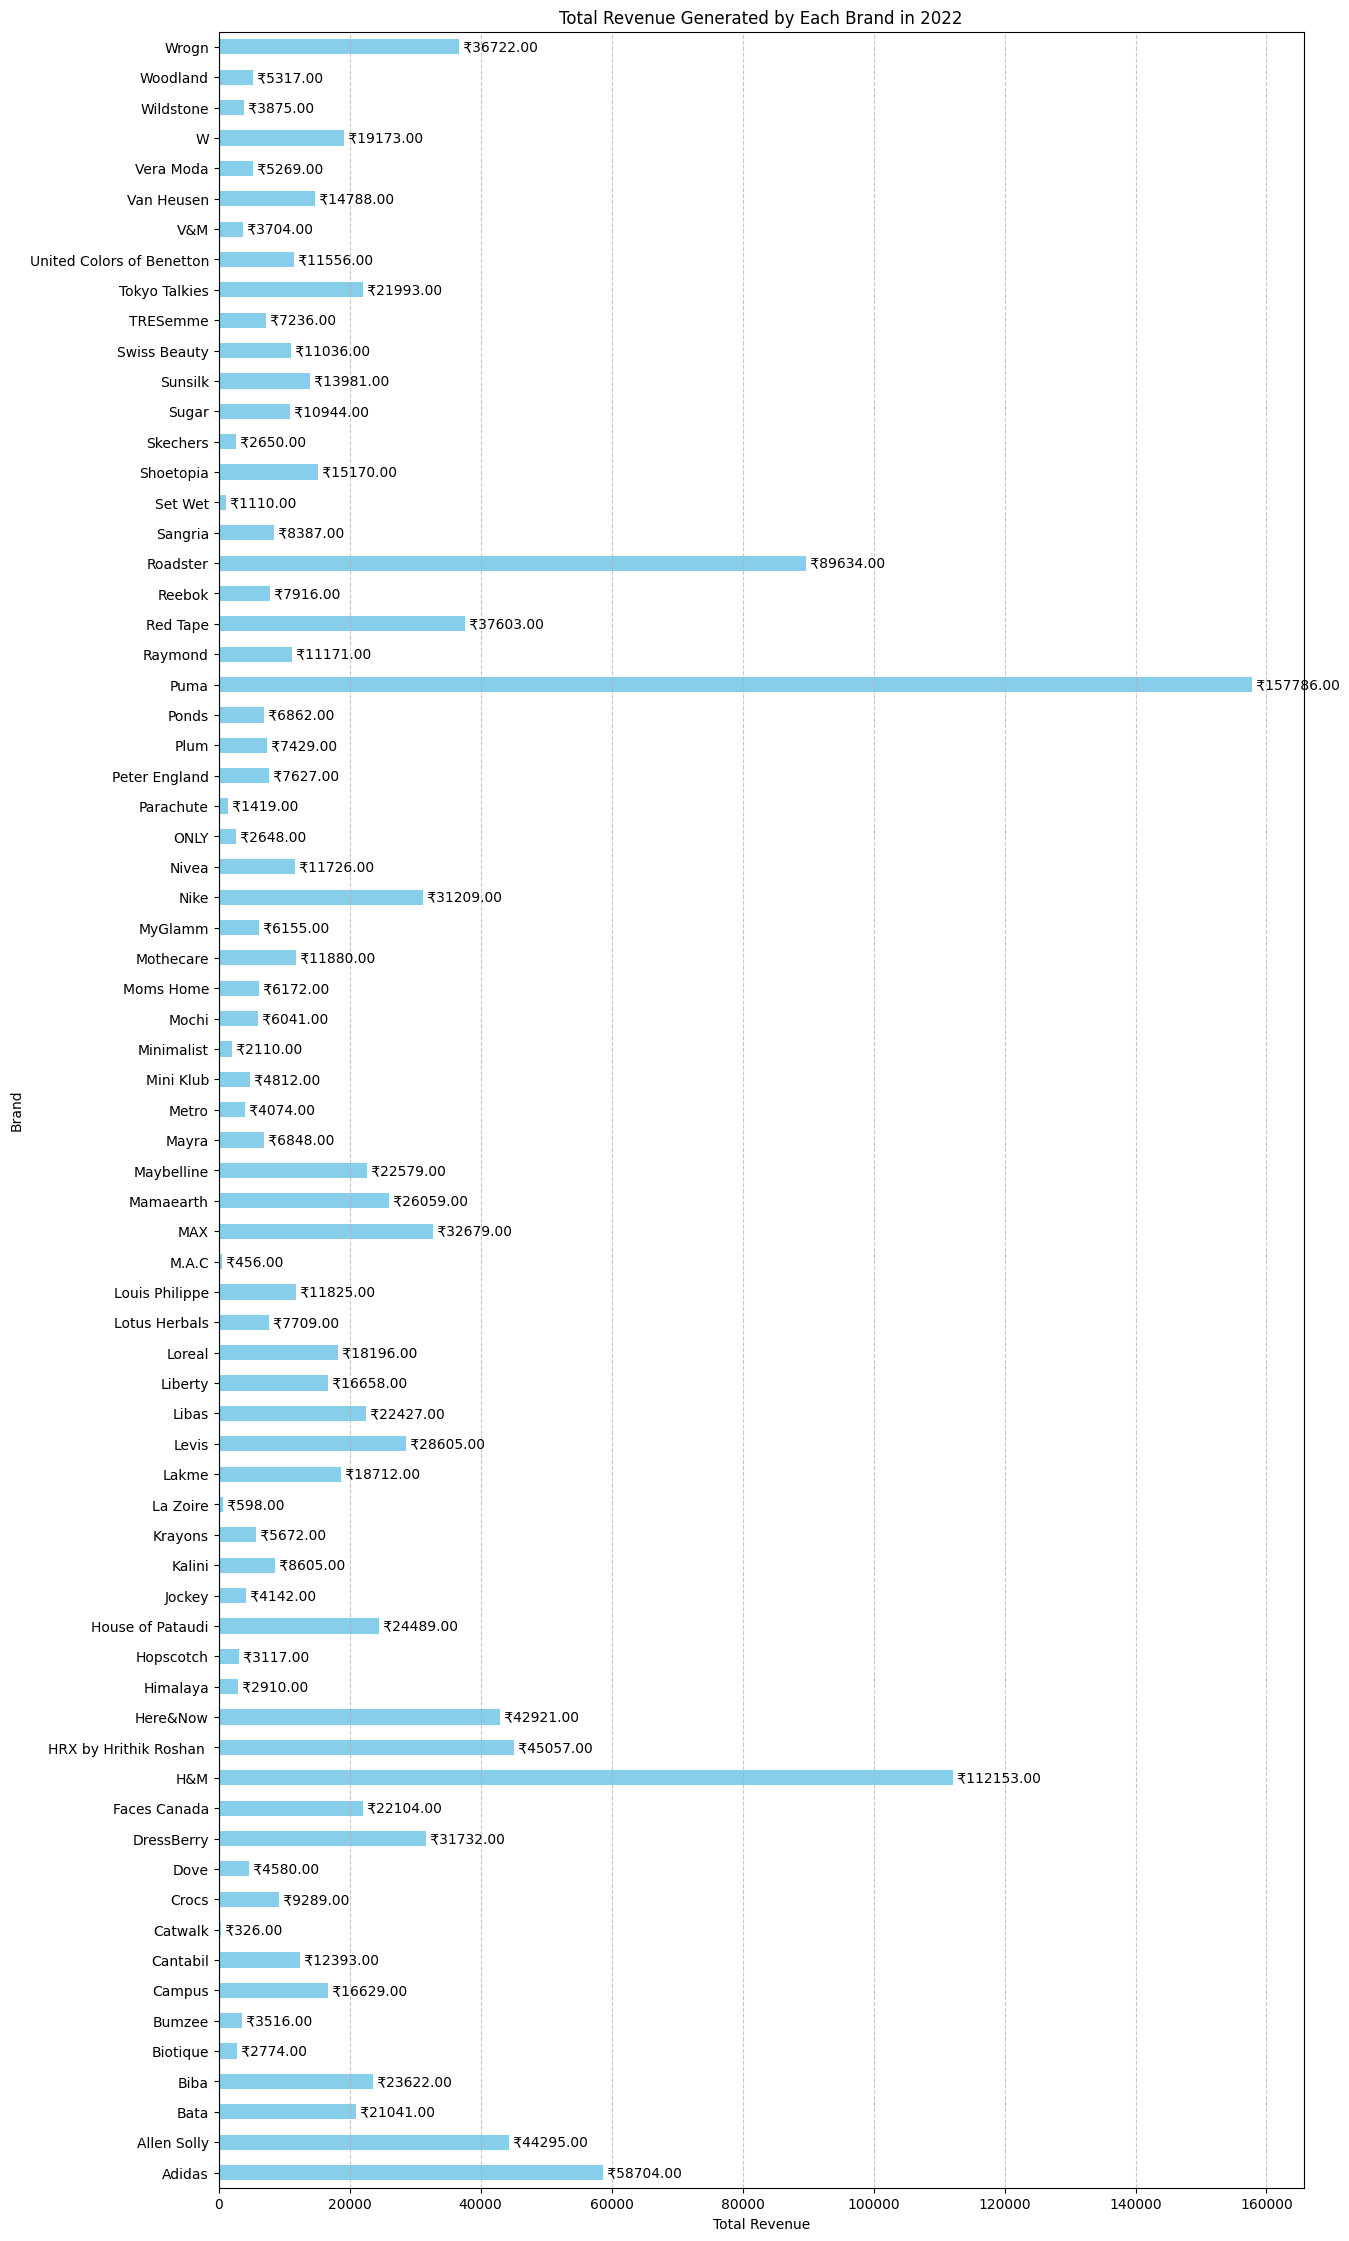

In [6]:
# Merge the DataFrames
merged_df = pd.merge(order_df, product_df, on='Product ID')

# Ensure that the 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter data for the year 2022
revenue_2022 = merged_df[merged_df['Date'].dt.year == 2022]

# Group data by Brand and calculate the total revenue
total_revenue_by_brand_2022 = revenue_2022.groupby('Brand Name')['Original Price'].sum()

# Plot horizontal bar graph b/w Brand and Total revnue generated.
plt.figure(figsize=(14, 28))
total_revenue_by_brand_2022.plot(kind='barh', color='skyblue')
plt.title('Total Revenue Generated by Each Brand in 2022')
plt.xlabel('Total Revenue')
plt.ylabel('Brand')
for i, value in enumerate(total_revenue_by_brand_2022):
    plt.text(value, i, f' ₹{value:.2f}', va='center')
    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


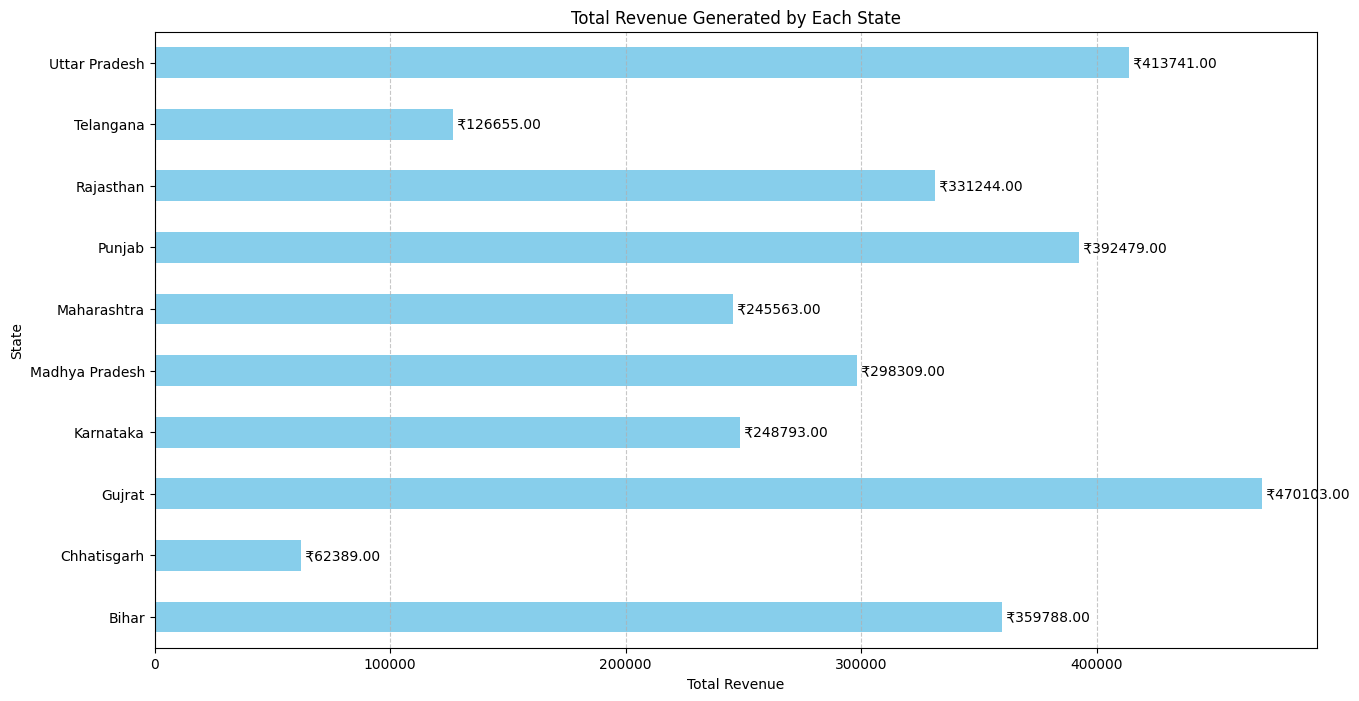

In [7]:
# Merge order data with customer data to get state information
merged_df = pd.merge(order_df, customer_df, how='inner', on='Customer ID')

# Group data by State and calculate the total revenue
total_revenue_by_state = merged_df.groupby('State')['Original Price'].sum()

# Plot horizontal bar graph
plt.figure(figsize=(15, 8))
bar_plot = total_revenue_by_state.plot(kind='barh', color='skyblue')
plt.title('Total Revenue Generated by Each State')
plt.xlabel('Total Revenue')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, value in enumerate(total_revenue_by_state):
    plt.text(value, i, f' ₹{value:.2f}', va='center')

plt.show()


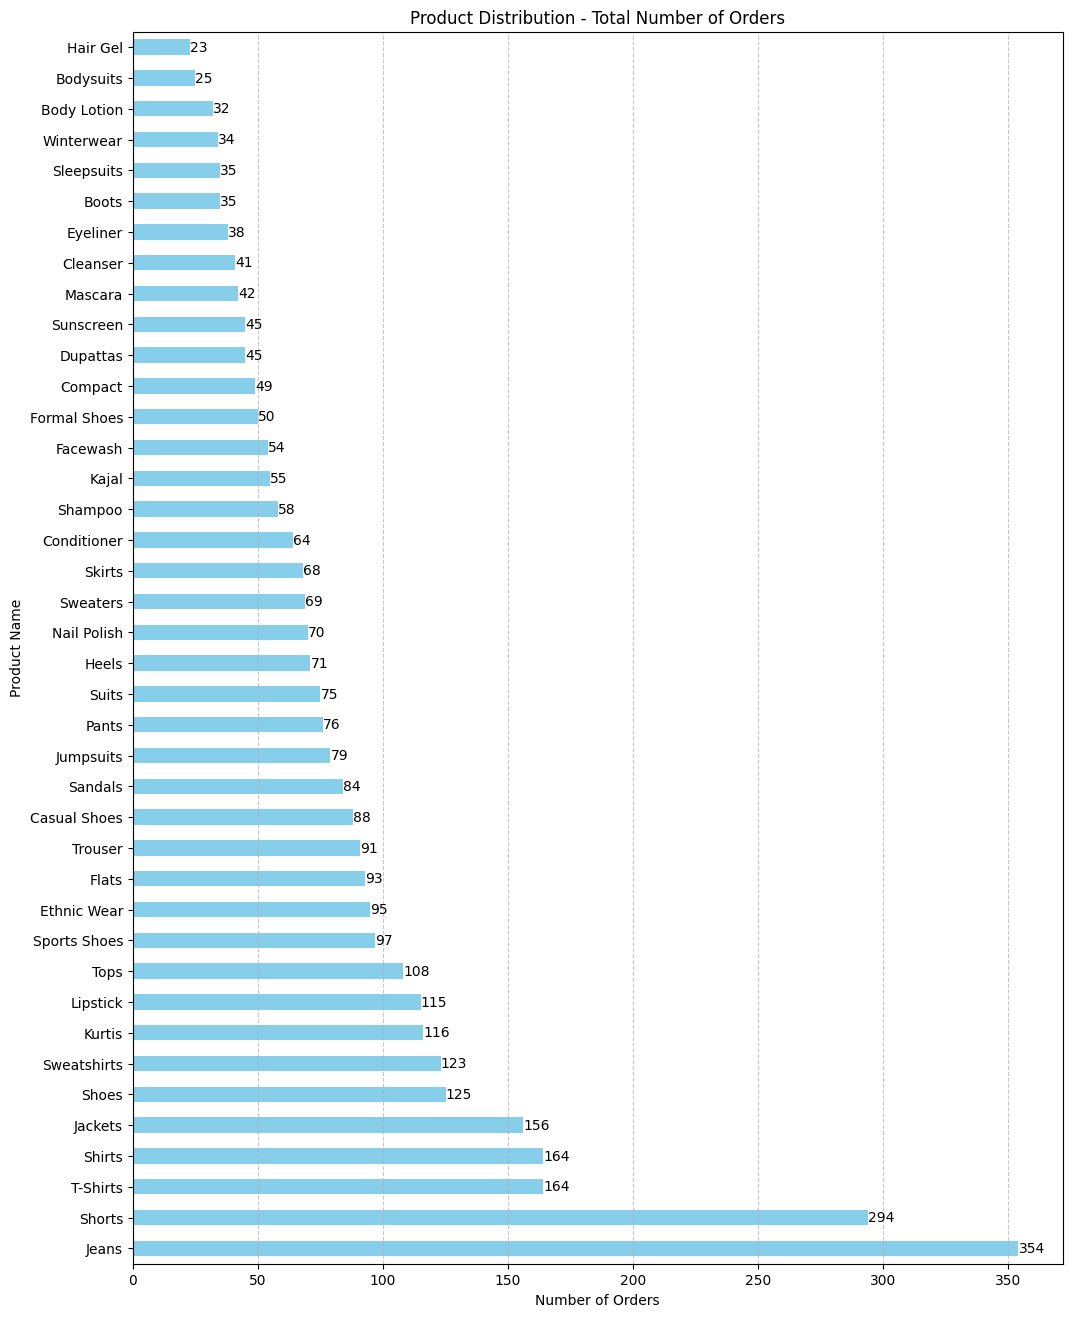

In [8]:

# Merge datasets on Product ID
merged_df = pd.merge(order_df, product_df, how='left', left_on='Product ID', right_on='Product ID')

# Count the number of times each product is ordered
product_count = merged_df['Product Name'].value_counts()

# Bar graph for total no. of orders of each product
plt.figure(figsize=(12, 16))
bar_plot = product_count.plot(kind='barh', color='skyblue')
plt.title('Product Distribution - Total Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, value in enumerate(product_count):
    plt.text(value, i, str(value), ha='left', va='center')

plt.show()

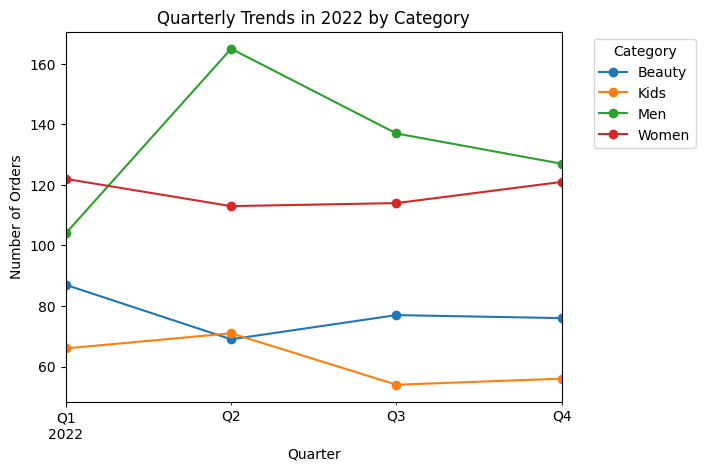

In [9]:
order_df['Date'] = pd.to_datetime(order_df['Date'], format='%m/%d/%Y') 
order_df['Quarter'] = order_df['Date'].dt.to_period('Q')
order_df['Year'] = order_df['Date'].dt.year

merged_data = pd.merge(order_df, product_df, on='Product ID')

# Filter Data for 2022
data_2022 = merged_data[merged_data['Year'] == 2022]

# Group Data
grouped_data = data_2022.groupby(['Category', 'Quarter']).size().unstack(fill_value=0)

# Plotting Line chart to show trend by quater
grouped_data = grouped_data.T  # Transpose DataFrame
grouped_data.plot(kind='line', marker='o')

plt.title('Quarterly Trends in 2022 by Category')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
